In [ ]:
#permito acceso al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Librerias

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [ ]:
#cargo el dataframe desde el archivo subido al drive
#el dataset usado es de historico de temperaturas de la Ciudad de Buenos Aires
dft = pd.read_csv('/content/drive/MyDrive/historico_temperaturas.csv', sep = ',')
dft

,año,mes,máxima,mínima,media
0,1991,Enero,28.4,19.8,24.10
1,1991,Febrero,27.8,17.8,22.80
2,1991,Marzo,27.6,18.4,23.00
3,1991,Abril,22.4,13.6,18.00
4,1991,Mayo,20.7,12.2,16.45
...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45
350,2020,Marzo,28.6,20.1,24.35
351,2020,Abril,22.8,13.6,18.20
352,2020,Mayo,20.4,11.0,15.70


In [ ]:
#cargo el dataframe desde el archivo subido al drive
#el dataset usado es de historico de precipitaciones de la Ciudad de Buenos Aires
dfp = pd.read_csv('/content/drive/MyDrive/historico_precipitaciones.csv', sep = ',')
dfp

,año,mes,mm,días
0,1991,Enero,190.0,7
1,1991,Febrero,30.5,6
2,1991,Marzo,55.0,8
3,1991,Abril,125.6,12
4,1991,Mayo,68.4,7
...,...,...,...,...
349,2020,Febrero,66.2,4
350,2020,Marzo,158.3,11
351,2020,Abril,87.2,7
352,2020,Mayo,22.6,4


In [ ]:
#cargo el dataframe desde el archivo subido al drive
#el dataset usado es de historico de velocidad del viento de la Ciudad de Buenos Aires
dfv = pd.read_csv('/content/drive/MyDrive/velocidad-max-viento.csv', sep = ',')
dfv

,fecha,nudos,km/h
0,1991-01,38,70
1,1991-02,19,35
2,1991-03,32,59
3,1991-04,40,74
4,1991-05,26,48
...,...,...,...
359,2020-12,33,62
360,2021-01,36,67
361,2021-02,28,52
362,2021-03,32,59


In [ ]:
#aca ya tengo que hacer datrawrangling para que todos mis datasets puedan estar relacionados. El de vel viento tiene filas extras que no me agregan valor
#les hago drop asi luego todo lo demas le aplico un merge
dfv.drop(range(354, 364, 1),axis=0)

,fecha,nudos,km/h
0,1991-01,38,70
1,1991-02,19,35
2,1991-03,32,59
3,1991-04,40,74
4,1991-05,26,48
...,...,...,...
349,2020-02,27,50
350,2020-03,25,46
351,2020-04,27,50
352,2020-05,32,59


In [ ]:
#fusiono los datasets temperatura, precipitaciones y vel viento luego del arreglo que tienen el mismo formato e indices mes y año de captura de datos
dfy=pd.merge(dft, dfp, left_index=True, right_index=True)
dfy=pd.merge(dfy, dfv, left_index=True, right_index=True)
dfy

,año_x,mes_x,máxima,mínima,media,año_y,mes_y,mm,días,fecha,nudos,km/h
0,1991,Enero,28.4,19.8,24.10,1991,Enero,190.0,7,1991-01,38,70
1,1991,Febrero,27.8,17.8,22.80,1991,Febrero,30.5,6,1991-02,19,35
2,1991,Marzo,27.6,18.4,23.00,1991,Marzo,55.0,8,1991-03,32,59
3,1991,Abril,22.4,13.6,18.00,1991,Abril,125.6,12,1991-04,40,74
4,1991,Mayo,20.7,12.2,16.45,1991,Mayo,68.4,7,1991-05,26,48
...,...,...,...,...,...,...,...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45,2020,Febrero,66.2,4,2020-02,27,50
350,2020,Marzo,28.6,20.1,24.35,2020,Marzo,158.3,11,2020-03,25,46
351,2020,Abril,22.8,13.6,18.20,2020,Abril,87.2,7,2020-04,27,50
352,2020,Mayo,20.4,11.0,15.70,2020,Mayo,22.6,4,2020-05,32,59


In [ ]:
#emprolijo el dataframe borrando columnas repetidas como año_y, mes_y y fecha del dataset precipitaciones-viento
dfg=dfy.drop(['año_y','mes_y','fecha'], axis=1)
dfg

,año_x,mes_x,máxima,mínima,media,mm,días,nudos,km/h
0,1991,Enero,28.4,19.8,24.10,190.0,7,38,70
1,1991,Febrero,27.8,17.8,22.80,30.5,6,19,35
2,1991,Marzo,27.6,18.4,23.00,55.0,8,32,59
3,1991,Abril,22.4,13.6,18.00,125.6,12,40,74
4,1991,Mayo,20.7,12.2,16.45,68.4,7,26,48
...,...,...,...,...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45,66.2,4,27,50
350,2020,Marzo,28.6,20.1,24.35,158.3,11,25,46
351,2020,Abril,22.8,13.6,18.20,87.2,7,27,50
352,2020,Mayo,20.4,11.0,15.70,22.6,4,32,59


In [ ]:
#Agrego columnas adicionales para representar el mes en numeros 1,2,3....12
#Adicionalmente agrego columna indicando la estacion del año para los meses que no son de solsticio
#creo funcion para limpiar los valores en cada columna
def mes_num(x):
  if'Enero' in str(x):
    return 1
  if'Febrero' in str(x):
    return 2
  if'Marzo' in str(x):
    return 3
  if'Abril' in str(x):
    return 4
  if'Mayo' in str(x):
    return 5
  if'Junio' in str(x):
    return 6
  if'Julio' in str(x):
    return 7
  if'Agosto' in str(x):
    return 8
  if'Septiembre' in str(x):
    return 9
  if'Octubre' in str(x):
    return 10
  if'Noviembre' in str(x):
    return 11
  if'Diciembre' in str(x):
    return 12            
  else:
    return 0

In [ ]:
#pruebo la funcion
mes_num('Marzo')

3

In [ ]:
dfg['mes_num'] = dfg['mes_x'].apply(mes_num)

In [ ]:
dfg

,año_x,mes_x,máxima,mínima,media,mm,días,nudos,km/h,mes_num
0,1991,Enero,28.4,19.8,24.10,190.0,7,38,70,1
1,1991,Febrero,27.8,17.8,22.80,30.5,6,19,35,2
2,1991,Marzo,27.6,18.4,23.00,55.0,8,32,59,3
3,1991,Abril,22.4,13.6,18.00,125.6,12,40,74,4
4,1991,Mayo,20.7,12.2,16.45,68.4,7,26,48,5
...,...,...,...,...,...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45,66.2,4,27,50,2
350,2020,Marzo,28.6,20.1,24.35,158.3,11,25,46,3
351,2020,Abril,22.8,13.6,18.20,87.2,7,27,50,4
352,2020,Mayo,20.4,11.0,15.70,22.6,4,32,59,5


In [ ]:
#creo funcion para asignar indicativo de estacion 
def estacion(x):
  if'Enero' in str(x):
    return 'Verano'
  if'Febrero' in str(x):
    return 'Verano'
  if'Marzo' in str(x):
    return 'Verano-Otono'
  if'Abril' in str(x):
    return 'Otono'
  if'Mayo' in str(x):
    return 'Otono'
  if'Junio' in str(x):
    return 'Otono-Invierno'
  if'Julio' in str(x):
    return 'Invierno'
  if'Agosto' in str(x):
    return 'Invierno'
  if'Septiembre' in str(x):
    return 'Invierno-Primavera'
  if'Octubre' in str(x):
    return 'Primavera' 
  if'Noviembre' in str(x):
    return 'Primavera'
  if'Diciembre' in str(x):
    return 'Primavera-Verano'          
  else:
    return 'error'

In [ ]:
estacion('Abril')

'Otono'

In [ ]:
#agrego columna adicional indicando estaciones
dfg['estacion'] = dfg['mes_x'].apply(estacion)
dfg

,año_x,mes_x,máxima,mínima,media,mm,días,nudos,km/h,mes_num,estacion
0,1991,Enero,28.4,19.8,24.10,190.0,7,38,70,1,Verano
1,1991,Febrero,27.8,17.8,22.80,30.5,6,19,35,2,Verano
2,1991,Marzo,27.6,18.4,23.00,55.0,8,32,59,3,Verano-Otono
3,1991,Abril,22.4,13.6,18.00,125.6,12,40,74,4,Otono
4,1991,Mayo,20.7,12.2,16.45,68.4,7,26,48,5,Otono
...,...,...,...,...,...,...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45,66.2,4,27,50,2,Verano
350,2020,Marzo,28.6,20.1,24.35,158.3,11,25,46,3,Verano-Otono
351,2020,Abril,22.8,13.6,18.20,87.2,7,27,50,4,Otono
352,2020,Mayo,20.4,11.0,15.70,22.6,4,32,59,5,Otono


In [ ]:
#como sugieren los notebooks de clase, hacemos el EDA del dataset 
#aca quede antes de ir a cumpleaños
dfg.head()

,año_x,mes_x,máxima,mínima,media,mm,días,nudos,km/h,mes_num,estacion
0,1991,Enero,28.4,19.8,24.10,190.0,7,38,70,1,Verano
1,1991,Febrero,27.8,17.8,22.80,30.5,6,19,35,2,Verano
2,1991,Marzo,27.6,18.4,23.00,55.0,8,32,59,3,Verano-Otono
3,1991,Abril,22.4,13.6,18.00,125.6,12,40,74,4,Otono
4,1991,Mayo,20.7,12.2,16.45,68.4,7,26,48,5,Otono


In [ ]:
dfg.shape

(354, 11)

In [ ]:
#Verifico tipos de datos del dataset 
dfg.dtypes

año_x         int64
mes_x        object
máxima      float64
mínima      float64
media       float64
mm          float64
días          int64
nudos         int64
km/h          int64
mes_num       int64
estacion     object
dtype: object

In [ ]:
dfg.describe()

,año_x,máxima,mínima,media,mm,días,nudos,km/h,mes_num
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,2005.254237,22.956780,13.853107,18.404929,105.403107,9.714689,29.183616,54.008475,6.449153
std,8.530419,5.107615,4.496836,4.776078,74.275866,3.602872,9.222627,17.102671,3.456564
min,1991.000000,12.600000,4.600000,8.950000,0.400000,1.000000,10.000000,19.000000,1.000000
25%,1998.000000,18.500000,10.125000,14.212500,48.825000,7.000000,24.000000,44.000000,3.000000
50%,2005.000000,22.850000,13.700000,18.275000,90.900000,10.000000,29.000000,54.000000,6.000000
75%,2013.000000,27.700000,18.100000,22.900000,144.575000,12.000000,35.000000,65.000000,9.000000
max,2020.000000,32.500000,21.700000,27.000000,421.000000,23.000000,60.000000,111.000000,12.000000


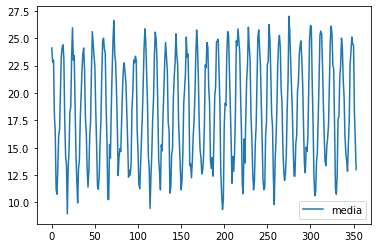

In [ ]:
#graficos exploratorios Univariados - Temp media mensual por años
dfg.plot(y='media')

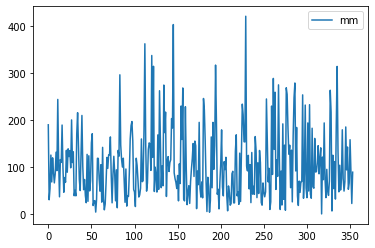

In [ ]:
#graficos exploratorios Univariados - mm de lluvia mensual por años
dfg.plot(y='mm')

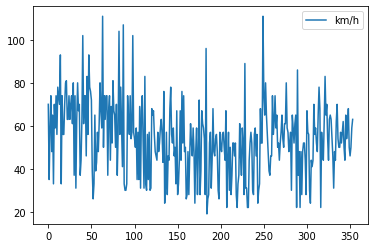

In [ ]:
#graficos exploratorios Univariados - vel viento km/h
dfg.plot(y='km/h')

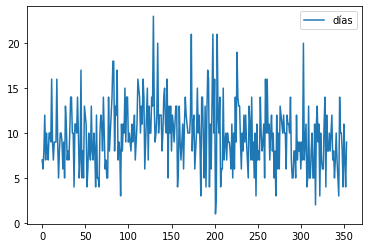

In [ ]:
#graficos exploratorios Univariados - dias de lluvia por mes durante todos los años
dfg.plot(y='días')

In [ ]:
#Revision de los datos por Mes
test=dfg.loc[dfg['estacion']=='Verano-Otono']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


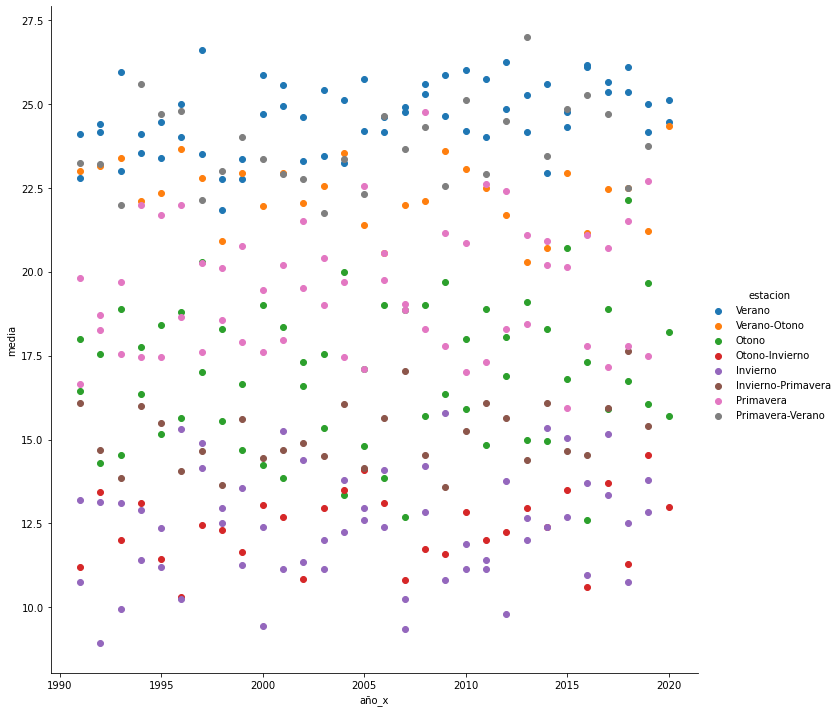

In [ ]:
##FacetGrid - meses vs media (temp)
sns.FacetGrid(dfg,hue = 'estacion' , size = 10).map(plt.scatter,'','media').add_legend();
plt.show()

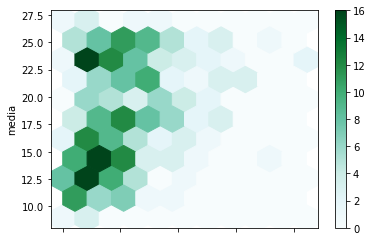

In [ ]:
dfg.plot.hexbin(x='mm', y='media', gridsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


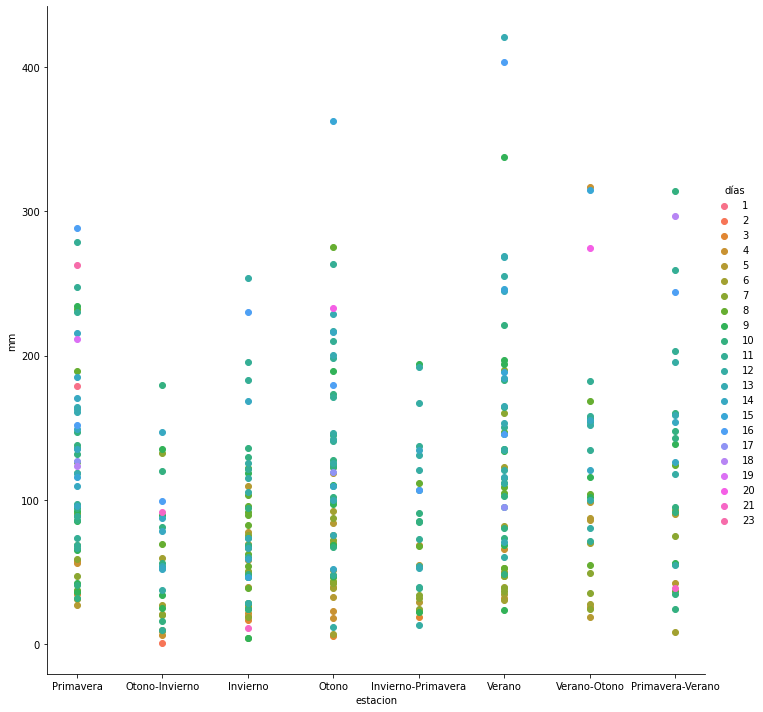

In [ ]:
#FacetGrid - año_x vs mm de lluvia
sns.FacetGrid(dfg,hue = 'días' , size = 10).map(plt.scatter,'estacion','mm').add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


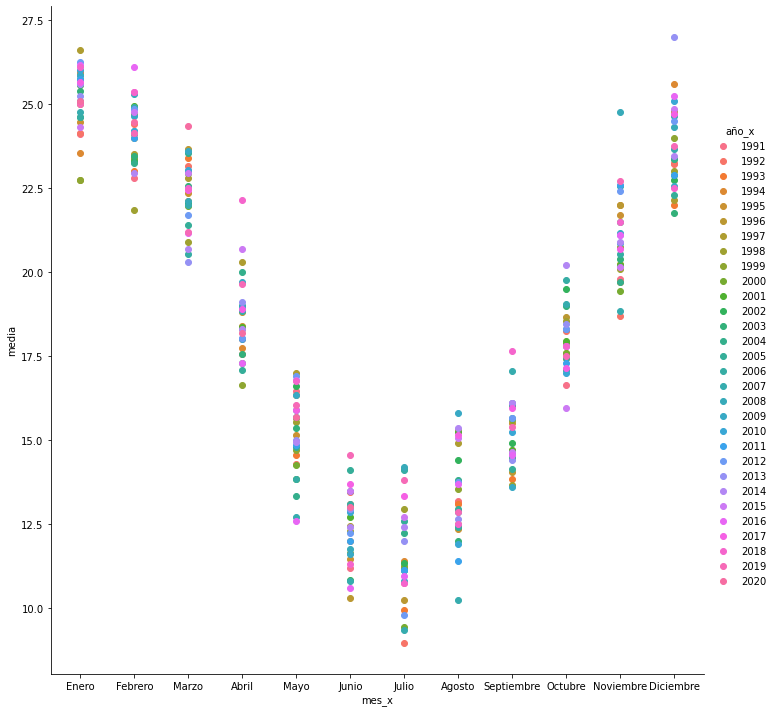

In [ ]:
#FacetGrid - mes_x vs media (temp)
sns.FacetGrid(dfg,hue = 'año_x' , size = 10).map(plt.scatter,'mes_x','media').add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


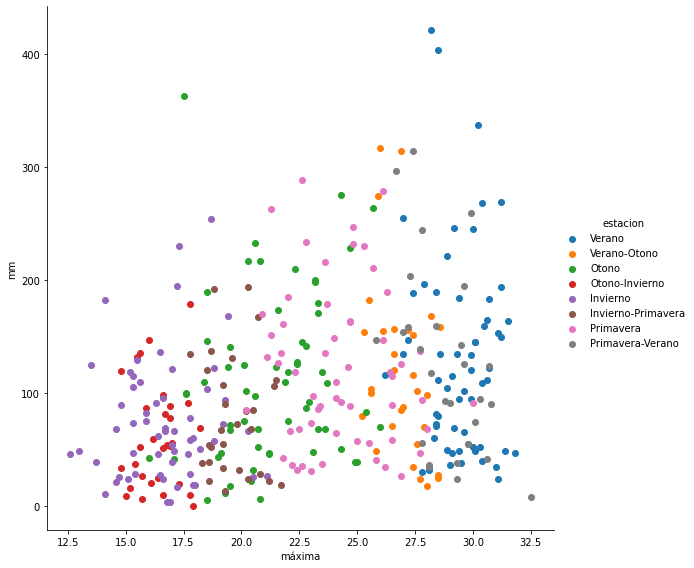

In [ ]:
##FacetGrid - mm de lluvia vs maxima (temp)
sns.FacetGrid(dfg,hue = 'estacion' , size = 8).map(plt.scatter,'máxima','mm').add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


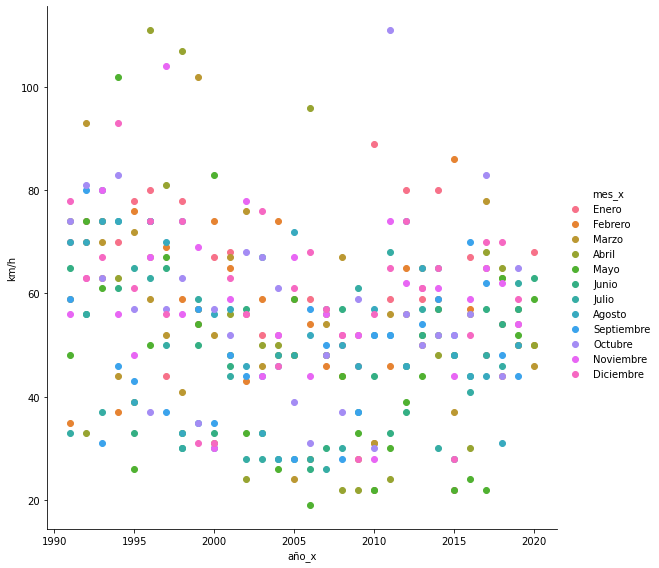

In [ ]:
##FacetGrid - mm de lluvia vs maxima (temp)
sns.FacetGrid(dfg,hue = 'mes_x' , size = 8).map(plt.scatter,'año_x','km/h').add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


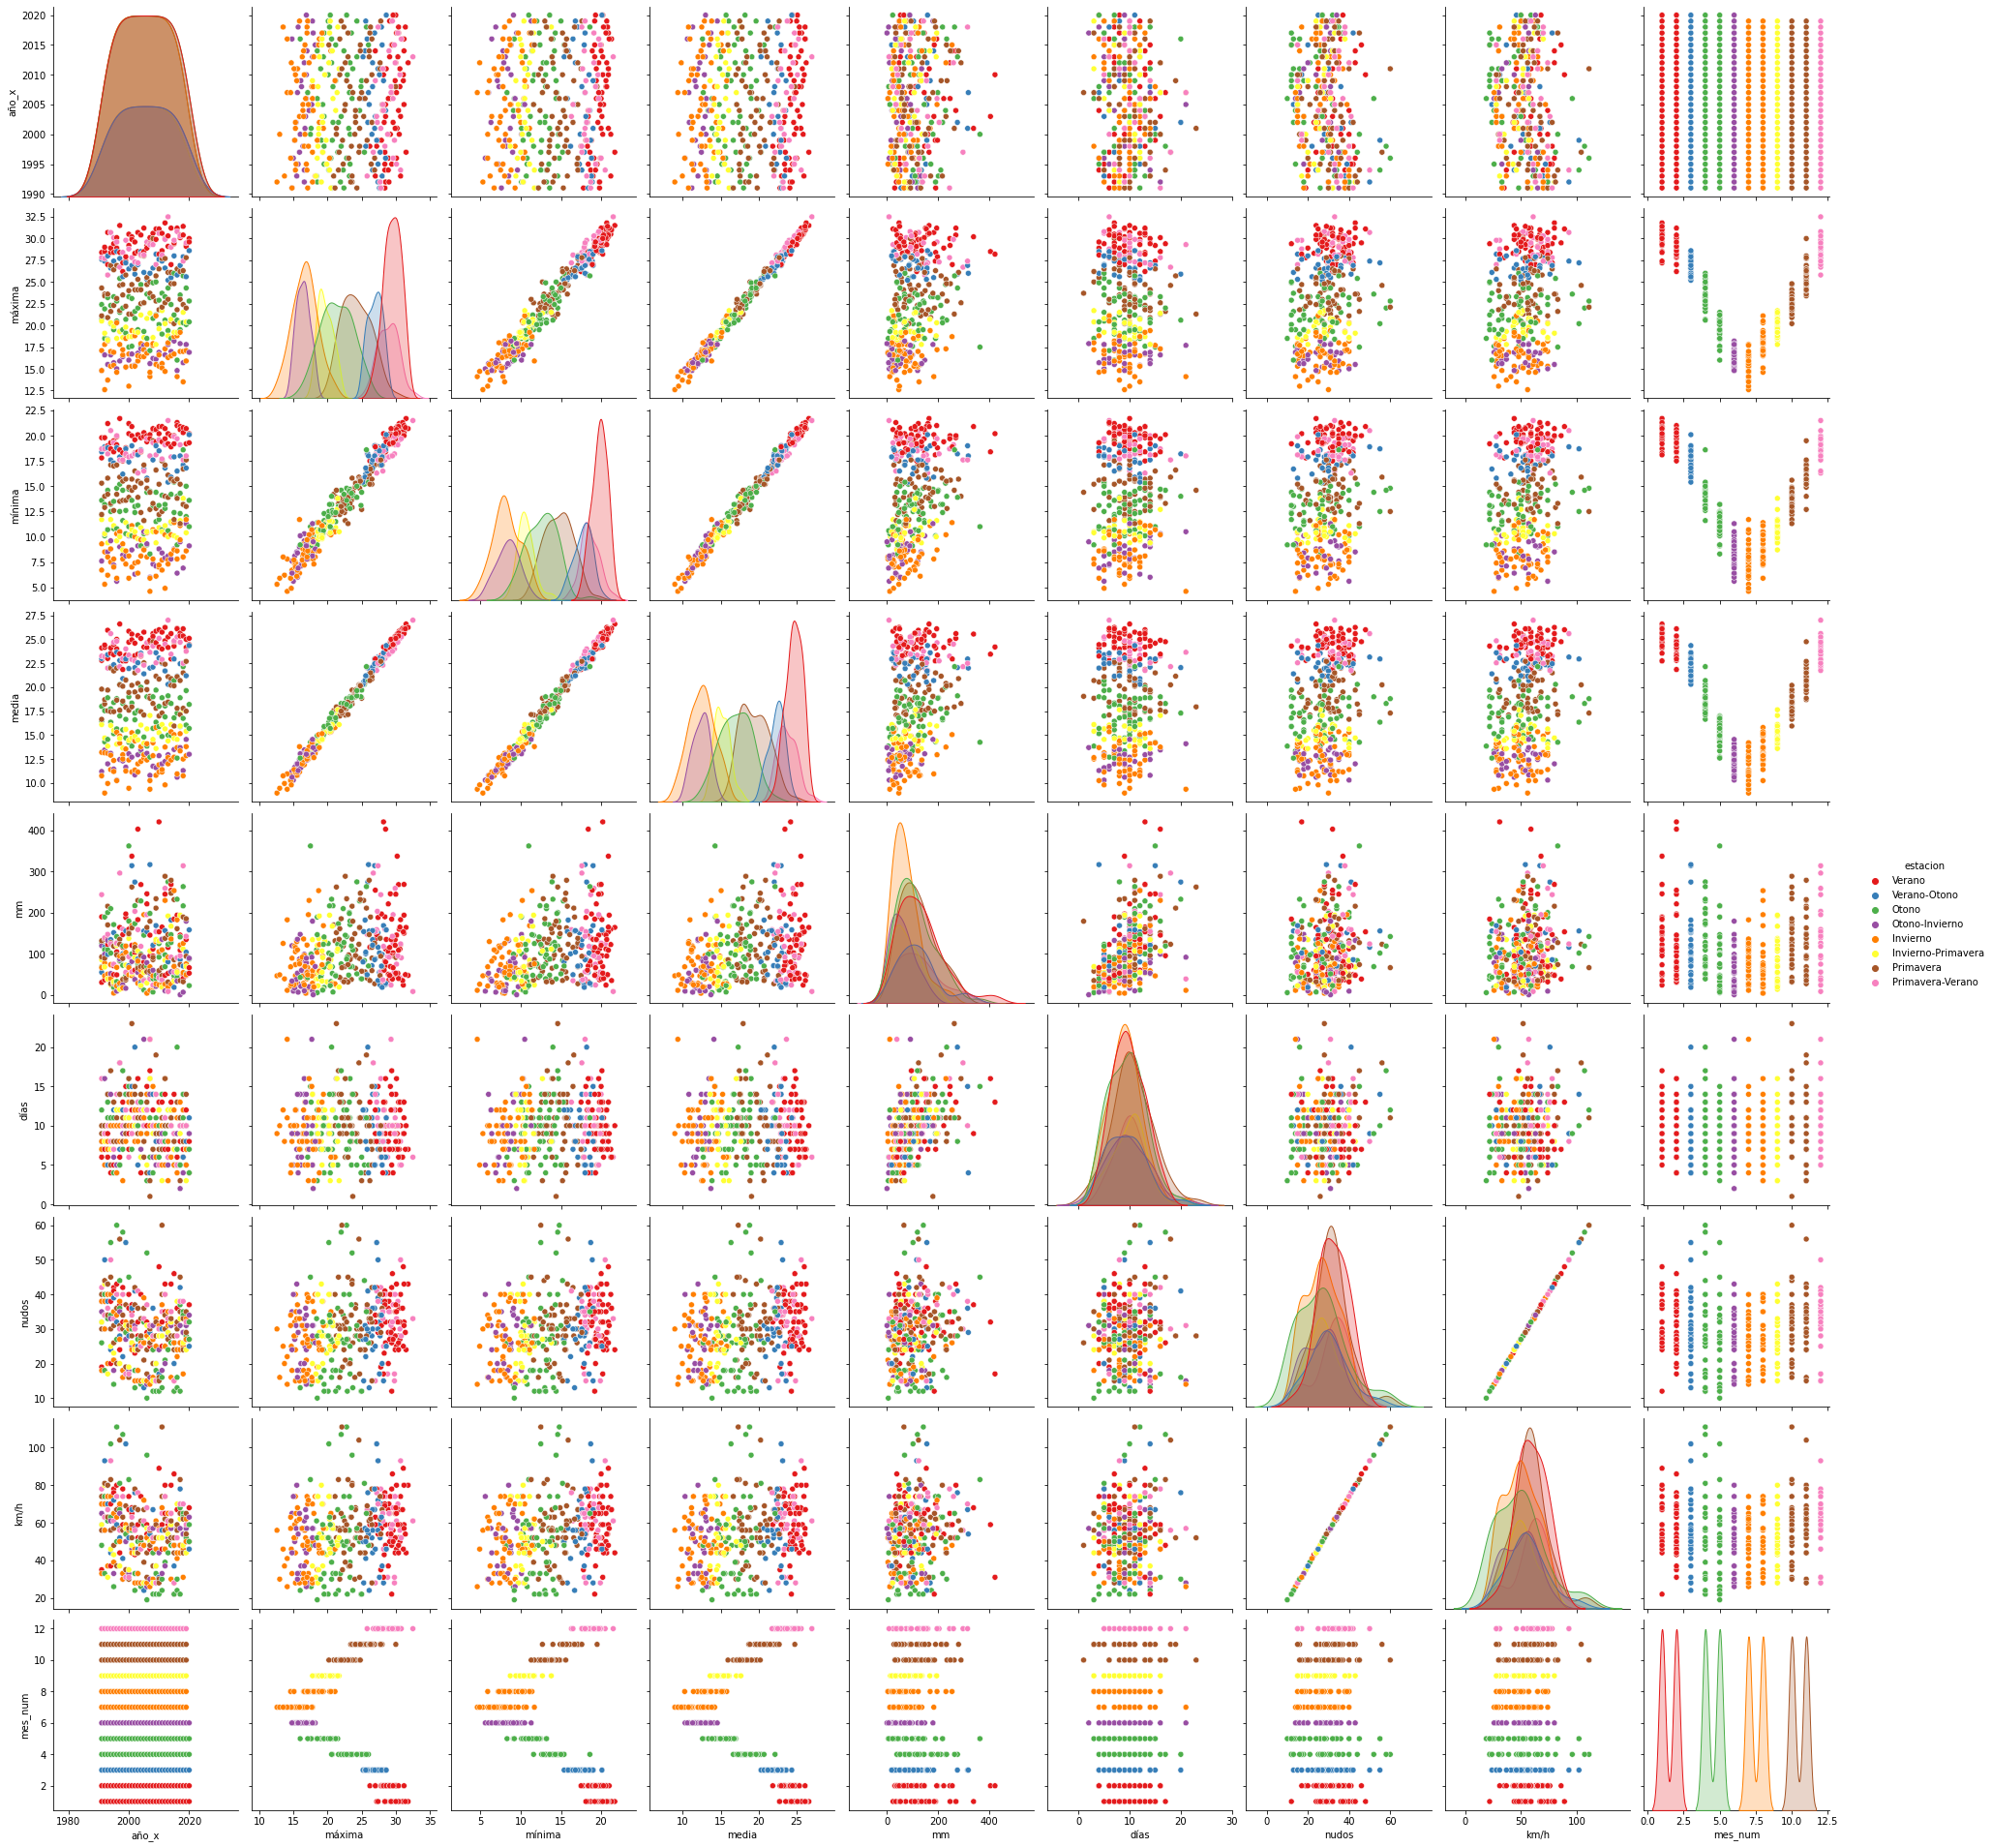

In [ ]:
#Pairplot
sns.pairplot(dfg,hue = 'estacion' , size = 3 , palette = 'Set1')

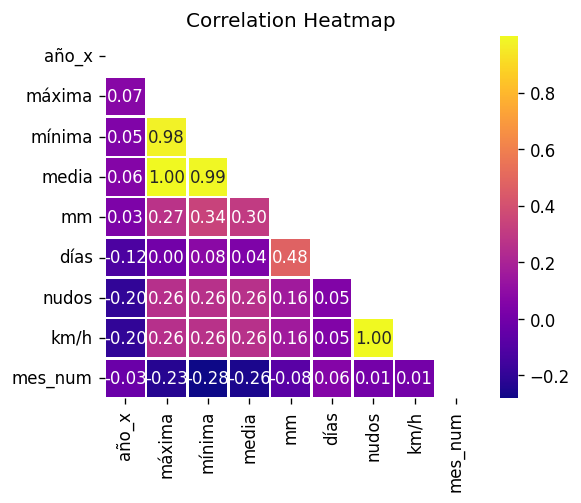

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dfg.corr(),dtype = bool))
sns.heatmap(dfg.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
## Estandarizar variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['máxima',	'mínima',	'media',	'mm',	'días',	'nudos',	'km/h',	'mes_num']
# Separating out the features
x = dfg.loc[:, features].values
# Separating out the target
y = dfg.loc[:,['estacion']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#x=dfg.drop(['mes_x','estacion','año_x'], axis=1)
#datos.head()
x


array([[ 1.06721531,  1.32433338,  1.19410354, ...,  0.95730463,
         0.93635436, -1.57869665],
       [ 0.94957738,  0.8789467 ,  0.92152841, ..., -1.105762  ,
        -1.11300627, -1.28898249],
       [ 0.91036473,  1.01256271,  0.96346305, ...,  0.30580991,
         0.29226959, -0.99926833],
       ...,
       [-0.03073873, -0.05636532, -0.04296819, ..., -0.23710236,
        -0.23470886, -0.70955417],
       [-0.50129045, -0.635368  , -0.56715113, ...,  0.30580991,
         0.29226959, -0.41984001],
       [-1.18751173, -1.05848534, -1.13326871, ...,  0.52297481,
         0.52648224, -0.13012585]])

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
comp=pca.fit_transform(x)

In [ ]:
principalDF=pd.DataFrame(data = comp
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDF=pd.concat([principalDF, dfg[['estacion']]], axis = 1)

In [ ]:
finalDF

,principal component 1,principal component 2,estacion
0,2.796556,-0.032648,Verano
1,0.621039,-2.433689,Verano
2,1.571317,-0.571728,Verano-Otono
3,0.771354,1.411291,Otono
4,-0.920260,-0.348780,Otono
...,...,...,...
349,1.708133,-1.604428,Verano
350,1.963625,-1.602970,Verano-Otono
351,-0.205290,-0.513799,Otono
352,-1.004793,0.479452,Otono


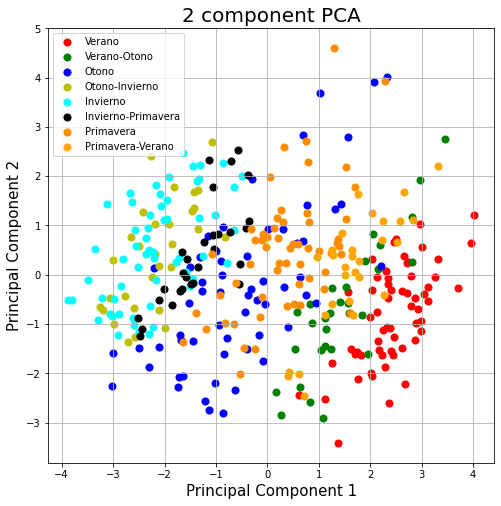

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Verano', 'Verano-Otono', 'Otono', 'Otono-Invierno','Invierno','Invierno-Primavera','Primavera','Primavera-Verano']
colors = ['r', 'g', 'b','y','cyan','black','darkorange','orange']
for estacion, color in zip(targets,colors):
    indicesToKeep = finalDF['estacion'] == estacion
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
## Variabilidad explicada por cada componente
pca.explained_variance_ratio_

array([0.43861896, 0.21757003])

Los dos primeros componentes principales me ayudan a explicar el 66% de la informacion. Esto esta por ver si nos puede ser de utilidad.

In [ ]:
## Variabilidad acumulada
pca.explained_variance_ratio_.cumsum()

array([0.43861896, 0.65618899])